In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('heart.csv')

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.shape

(303, 14)

In [18]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
corr=df.corr()

<Axes: >

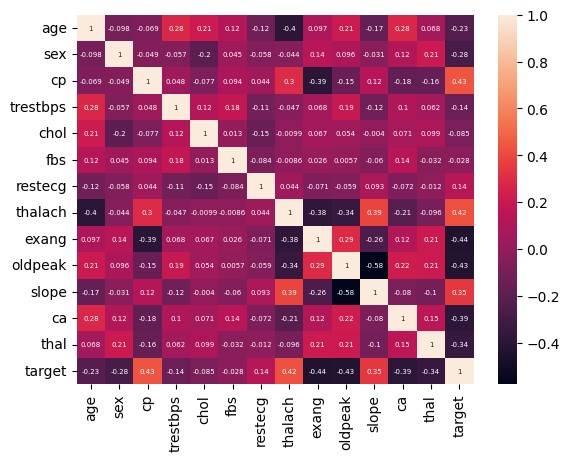

In [22]:
sns.heatmap(corr, annot=True, annot_kws={'size':5})

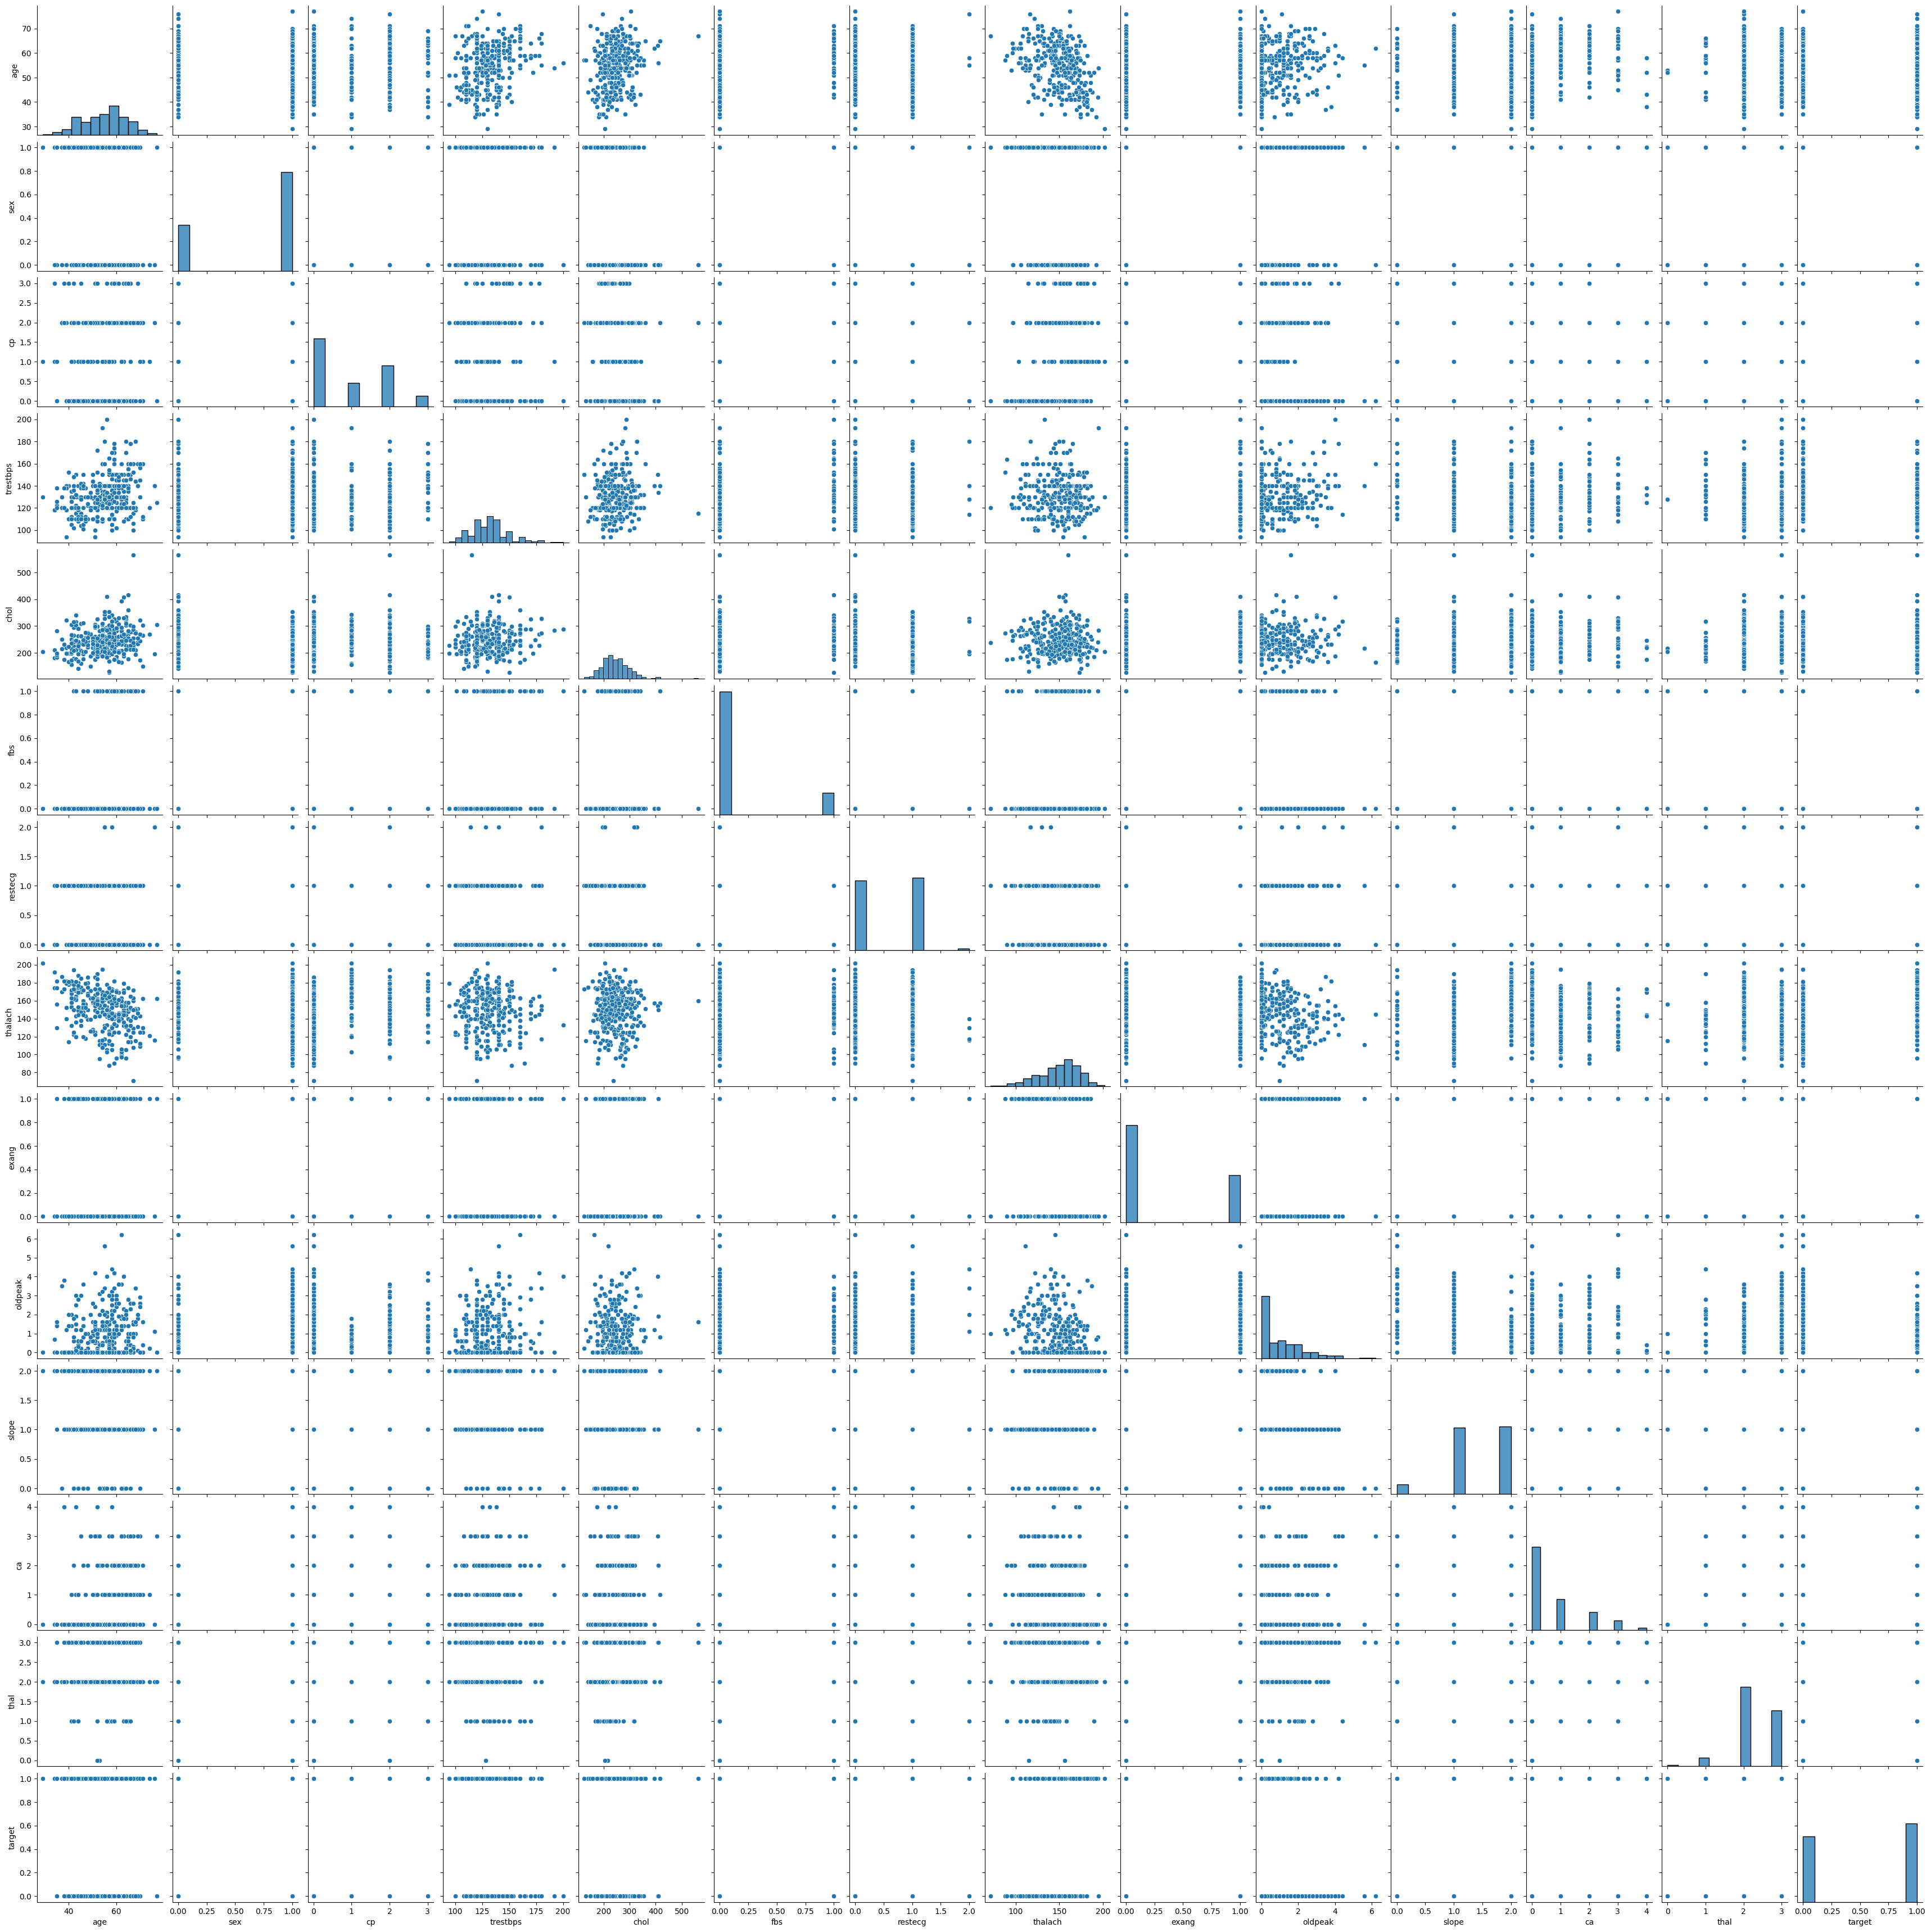

In [13]:
#sns.pairplot(df)

In [25]:
#selecting indeo=pendent and dependent
#independent
x=df.iloc[:,:-1].values
#dependent
y=df.iloc[:,-1].values

In [26]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [27]:
#scaling : use to standardize and normalize dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [53]:
#1. Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

#prediction
y_pred = classifier.predict(x_test)
y_pred


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [54]:
#For result
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print('')
print(confusion_matrix(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))

0.8289473684210527

[[24  9]
 [ 4 39]]

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



The LogisticRegression model achieved an overall accuracy of 83%, correctly predicting the outcome. Precision of 86% suggests that when the model predicts a positive outcome, it is correct 86% of the time. Recall of 73% indicates that the model correctly identified 73% of actual positive cases.

In [55]:
#2.Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(x_train, y_train)

y_pred1 = classifier1.predict(x_test)

print(accuracy_score(y_test, y_pred1))
print('')
print(confusion_matrix(y_test,y_pred1))
print('')
print(classification_report(y_test, y_pred1))


0.7894736842105263

[[25  8]
 [ 8 35]]

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



The DecisionTree model achieved an overall accuracy of 79%, correctly predicting the outcome. Precision of 76% suggests that when the model predicts a positive outcome, it is correct 76% of the time. Recall of 76% indicates that the model correctly identified 76% of actual positive cases.

In [57]:
#3.RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(x_train,y_train)

y_pred2 = classifier2.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print('')
print(confusion_matrix(y_test,y_pred2))
print('')
print(classification_report(y_test, y_pred2))


0.8157894736842105

[[25  8]
 [ 6 37]]

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.82      0.86      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



The RandomForestClassifier model achieved an overall accuracy of 82%, correctly predicting the outcome. Precision of 81% suggests that when the model predicts a positive outcome, it is correct 81% of the time. Recall of 76% indicates that the model correctly identified 76% of actual positive cases.

In [58]:
#4.Apply KNN
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 5)
classifier3.fit(x_train, y_train)
y_pred3 = classifier3.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print('')
print(confusion_matrix(y_test,y_pred3))
print('')
print(classification_report(y_test, y_pred3))

0.868421052631579

[[27  6]
 [ 4 39]]

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



 The KNN model achieved an overall accuracy of 87%, correctly predicting the outcome. Precision of 87% suggests that when the model predicts a positive outcome, it is correct 87% of the time. Recall of 82% indicates that the model correctly identified 82% of actual positive cases.

In [59]:
#5.Apply Naives bayes
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)
y_pred4 = classifier4.predict(x_test)
print(accuracy_score(y_test, y_pred4))
print('')
print(confusion_matrix(y_test,y_pred4))
print('')
print(classification_report(y_test, y_pred4))

0.7894736842105263

[[25  8]
 [ 8 35]]

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



The NaiveBayes model achieved an overall accuracy of 79%, correctly predicting the outcome. Precision of 76% suggests that when the model predicts a positive outcome, it is correct 76% of the time. Recall of 76% indicates that the model correctly identified 76% of actual positive cases.

In [60]:
#6.Apply LinearSVC
from sklearn.svm import LinearSVC
classifier5 = LinearSVC()
classifier5.fit(x_train, y_train)
y_pred5 = classifier5.predict(x_test)
print(accuracy_score(y_test, y_pred5))
print('')
print(confusion_matrix(y_test,y_pred5))
print('')
print(classification_report(y_test, y_pred5))


0.8289473684210527

[[24  9]
 [ 4 39]]

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



The LinearCVC model achieved an overall accuracy of 83%, correctly predicting the outcome. Precision of 86% suggests that when the model predicts a positive outcome, it is correct 86% of the time. Recall of 73% indicates that the model correctly identified 73% of actual positive cases.

In [61]:
#7.Apply Kernel SVC
from sklearn.svm import SVC
cf6=SVC(kernel='rbf', random_state=0)
cf6.fit(x_train, y_train)

y_pred6= cf6.predict(x_test)
print(accuracy_score(y_test, y_pred6))
print('')
print(confusion_matrix(y_test,y_pred6))
print('')
print(classification_report(y_test, y_pred6))


0.8552631578947368

[[25  8]
 [ 3 40]]

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



The KernelSVC model achieved an overall accuracy of 86%, correctly predicting the outcome. Precision of 89% suggests that when the model predicts a positive outcome, it is correct 89% of the time. Recall of 76% indicates that the model correctly identified 76% of actual positive cases.

In [64]:
#Linear regreession

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

y_pred7= lr.predict(x_test)
y_pred7

from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
metrics.r2_score(y_test, y_pred7)



0.45195996060257515

In [65]:
Classification_report=pd.DataFrame({
    'Model':['Logistic','Decision Tree','Random Forest classifier', ' KNN', 'Naives Bayes', 'LinearSVC', 'KernelSVC'],
    'Accuracy':[83,79,82,87,79,83,86],
    'precision':[86,76,81,87,76,86,89],
    'recall':[73,76,76,82,76,73,76]
})

In [66]:
Classification_report

,Model,Accuracy,precision,recall
0,Logistic,83,86,73
1,Decision Tree,79,76,76
2,Random Forest classifier,82,81,76
3,KNN,87,87,82
4,Naives Bayes,79,76,76
5,LinearSVC,83,86,73
6,KernelSVC,86,89,76


In [69]:
Classification_report.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,precision,recall
3,KNN,87,87,82
6,KernelSVC,86,89,76
0,Logistic,83,86,73
5,LinearSVC,83,86,73
2,Random Forest classifier,82,81,76
1,Decision Tree,79,76,76
4,Naives Bayes,79,76,76
